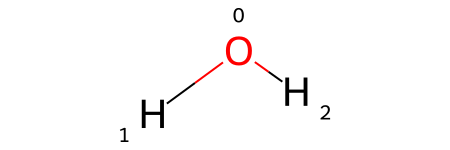

In [1]:

# import these definitions
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

# generate water molecule
smiles = "O"
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
Chem.AllChem.EmbedMolecule(mol)
Chem.AllChem.SetBondLength(mol.GetConformer(0),0,1,1.5) # for demonstration
Chem.MolToXYZFile(mol, "water.xyz")
mol

In [1]:
# import the package
from pyscf import gto, scf

mol = gto.M(atom="water.xyz")

# set basis set
mol.basis = "sto3g"

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

# run energy calculations
mf.kernel()

/opt/homebrew/lib/python3.11/site-packages/pyscf/dft/libxc.py:507: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


converged SCF energy = -75.2243348367665


-75.22433483676646

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from pyscf.gto.basis import load

def plot_primitive_gaussian(alpha,label=None):
    # set the range for r
    r = np.arange(-5,5,0.1)

    # gaussian function
    g = np.exp(-alpha * r * r)

    # plot
    plt.plot(r,g, label=label)


def plot_contracted_gaussian(contracted_gaussians, label="contracted"):
    # set the range for r
    r = np.arange(-5,5,0.1)

    # add the gaussians
    gs = np.zeros_like(r)
    for i in range(1,len(contracted_gaussians[0])):
      gs = np.add(gs,contracted_gaussians[0][i][1] * np.exp(-contracted_gaussians[0][i][0] * r * r))

    # normalize  
    gs = gs / np.max(gs)

    # plot
    plt.plot(r,gs, 'o',label=label)


def plot_slater():
    # set the range for r
    r = np.arange(-5,5,0.1)
    
    # slater function
    slater_1s = (1 / np.sqrt(np.pi)) * np.exp(-abs(r))
    slater_1s = slater_1s / np.max(slater_1s)

    # plot 
    plt.plot(r,slater_1s, '*',label="slater")

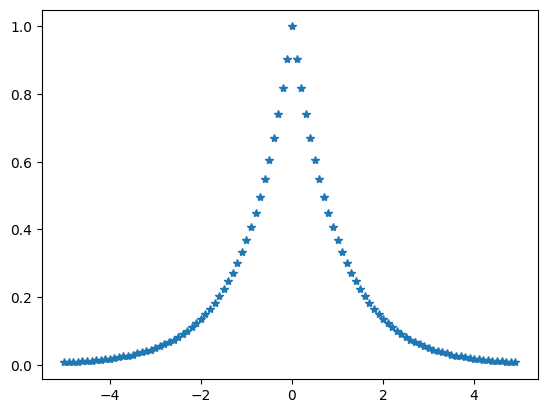

In [4]:
plot_slater()


In [7]:
load('sto3g', 'H')

[[0,
  [3.42525091, 0.15432897],
  [0.62391373, 0.53532814],
  [0.1688554, 0.44463454]]]

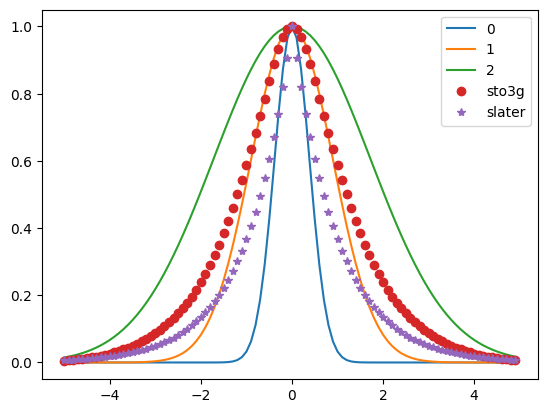

In [5]:

# plot the 3 primitive gaussian
plot_primitive_gaussian(alpha=3.42525091,label=0)
plot_primitive_gaussian(alpha=0.62391373,label=1)
plot_primitive_gaussian(alpha=0.1688554,label=2)

# plot the contracted gaussian function
plot_contracted_gaussian(load('sto3G', 'H'), label="sto3g")

# plot slater
plot_slater()

# add legends
plt.legend()
     
     

In [ ]:
load('sto3g', 'C')

load("3-21g",'C')

[[0,
  [71.616837, 0.15432897],
  [13.045096, 0.53532814],
  [3.5305122, 0.44463454]],
 [0,
  [2.9412494, -0.09996723],
  [0.6834831, 0.39951283],
  [0.2222899, 0.70011547]],
 [1,
  [2.9412494, 0.15591627],
  [0.6834831, 0.60768372],
  [0.2222899, 0.39195739]]]

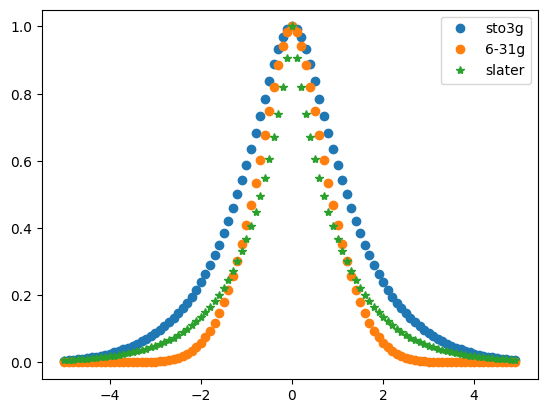

In [4]:
# comparing STO-3G and 6-31G for Hydrogen 1s orbital
plot_contracted_gaussian(load('sto3g', 'H'), label="sto3g")
plot_contracted_gaussian(load('6-31G', 'H'), label="6-31g")

plot_slater()
plt.legend()

In [ ]:
load("6-311g",'C')
load("6-31g*",'C')
load("6-31g*",'H')
load("6-31g**",'H')

[[0, [18.731137, 0.0334946], [2.8253937, 0.23472695], [0.6401217, 0.81375733]],
 [0, [0.1612778, 1.0]],
 [1, [1.1, 1.0]]]

In [ ]:
from pyscf.geomopt.geometric_solver import optimize

# create the pyscf molecule 
mol = gto.M(atom="water.xyz")

# set basis set
mol.basis = "sto3g"

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

# run optimatization  calculations
mol_eq = optimize(mf)
     

In [8]:
# save the optimized geometry for visualization
mol_eq.tofile("opt_water.xyz")

'3\nXYZ from PySCF\nO          -0.17513        0.34885        0.00000\nH          -0.88936       -0.38891        0.00000\nH           0.64628       -0.26787        0.00000'

In [ ]:
conv_params = {
    'convergence_energy': 1e-1,  # Eh
    'convergence_grms': 3e-1,    # Eh/Bohr
    'convergence_gmax': 4.5e-1,  # Eh/Bohr
    'convergence_drms': 1.2e-1,  # Angstrom
    'convergence_dmax': 1.8e-1,  # Angstrom
}

mol_eq = optimize(mf, **conv_params)

     
     

In [23]:
# create a molecule object
mol = gto.M(atom="opt_water.xyz")

# set basis set
mol.basis = "sto3g"

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

# run frequency calculation
mf.run()
hessian = mf.Hessian().kernel()

converged SCF energy = -75.322774856751


In [24]:
from pyscf.hessian import thermo

# getting the frequency data from the calculation
freq_info = thermo.harmonic_analysis(mf.mol, hessian)
freq_info["freq_wavenumber"]

array([2016.94031821, 3614.22231237, 3838.59554481])

Exercise

Run the frequncy calculation for the unoptimized water molecule (water.xyz). What do you observe?

that the output has complex numbers, which means the molecule is an energy local maximum instead of minimum.

In [ ]:
from pyscf.hessian import thermo

# create a molecule object
mol = gto.M(atom="water.xyz")

# set basis set
mol.basis = "sto3g"

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

# run frequency calculation
mf.run()
hessian = mf.Hessian().kernel()

# getting the frequency data from the calculation
freq_info = thermo.harmonic_analysis(mf.mol, hessian)
freq_info["freq_wavenumber"]

converged SCF energy = -75.2243348367665


array([   0.        +574.60849483j, 1407.03774179  +0.j        ,
       4185.69118829  +0.j        ])